In [1]:
%config IPCompleter.greedy=True

 ## Transport theorem


 $$
 d_t \int_\Omega \phi dV = \int_\Omega\partial_t \phi +\nabla\cdot (\phi\otimes v)dV = \int_\Omega\partial_t \phi dV +\int_{\partial\Omega}\phi \langle v, dA\rangle = \int_\Omega s_\Omega dV+\int_{\partial\Omega} s_{\partial\Omega} dA\label{eq:transport}\\
 $$
 $$
 |\Omega|\partial_t\bar{\phi} = |\Omega|\bar{s_\Omega}+\sum_f|\partial\Omega_f|\langle(s_{\partial\Omega} - \phi v)_f,n_f\rangle\label{eq:fvm}
 $$
 One should use operator splitting to be able to solve without the volume source term first.

  #### Transport equations

  - ordered basis of species $\mathcal{S}$, called $\mathrm{species}$
  - species $s\in\mathcal{S}$ with
    - mass fraction $Y_s$
    - molar fraction $X_s$
    - mass production rate $\omega_s$
    - enthalpy per unit mass $h_s$
    - force per unit mass $a_s$, usually gravitational acceleration $\bf{a}_s\ = \bf{g} = - \nabla (gz)$
  - diffusion matrix $D$ with component $D_{ab}$ being cross-diffusion of species $a$ with respect to species $b$, $(a,b)\in\mathrm{species}\times\mathrm{species}$
  - species thermal diffusion $\theta$, where component $\theta_a$ is thermal diffusion of species $a$
  - species thermal diffusion ratios $\chi = D^{-1}\theta$, where component $\chi_a$ is thermal diffusion ratio of species $a$
  - thermal conductivity $\lambda$
  - absolute temperature $T$
  - thermodynamic pressure $p$

  Multicomponent variables:
  $$
  \begin{align}
  X_a &= \frac{(\rho_{N})_a}{\rho_{N}}\\
  Y_a &= \frac{(\rho_m)_a}{\rho_m}\\
  q =&\left[\sum_{a\in\mathrm{species}}((\phi_m) h + p\chi V)_a\right]-\lambda\nabla T \\
  V_a =&\left[\sum_{b\in\mathrm{species}}D_{ab}\left[\nabla(X_b) +\frac{1}{p}\left[(X_b -Y_b)\nabla(p) + (\phi_m)_b\sum_{c\in\mathrm{species}}Y_c(a_c - a_b)\right]\right]\right]+\theta_a\frac{1}{T}\nabla(T)
  \end{align}
  $$

  Mass transport:
  $$
  \begin{align}
  (\phi_m)_a &= \rho_mY_a\\
  ((s_{\partial\Omega})_m)_a &= (\phi_m)_aV_a\\
  ((s_\Omega)_m)_a &= \omega_a\\
  \end{align}
  $$

  Momentum transport:
  $$
  \begin{align}
  (\phi_p)^k =&\; \rho_m v^k\\
  ((s_{\partial\Omega})_p)_{ij} =&\; (\sigma_\mathrm{static})_{ij} + (\sigma_\mathrm{elastic})_{ij} +
  (\sigma_\mathrm{viscous})_{ij}\\
  (\sigma_\mathrm{static})_{ij}=&-pg_{ij}\\
  (\sigma_\mathrm{elastic})_{ij}\stackrel{?}{=}&
  \frac{1}{2}[\partial_j(x-x_0)_i + \partial_i(x-x_0)_j - \partial_i(x-x_0)_k\partial_j(x-x_0)_k]\\
  (\sigma_\mathrm{viscous})_{ij}=& \mu \nabla_i(g_{jk}v^k) + \mu\nabla_j(g_{ik}v^k) + \lambda\nabla_k(g_{km}v^m)g_{ij}\\
  ((s_\Omega)_p)_i =& \sum_{s\in\mathrm{species}}(\phi_m \cdot a_i)_s
  \end{align}
  $$

  Energy transport:
  $$
  \begin{align}
  \phi_E =& \left[\sum_{s\in\mathrm{species}}(\phi_m h)_s\right] - p + \frac{1}{2}\langle\rho_m v, v\rangle\\
  (s_{\partial\Omega})_E =& -q+\langle \sigma, v\rangle\\
  (s_\Omega)_E =& \sum_{s\in\mathrm{species}}\langle (\phi_mv + \phi_m V)_s, (a)_s \rangle\\
  \end{align}
  $$

  #### Equations of State

  "Engineering Enthalpy" = "Enthalpy of Formation at $T_{\mathrm{ref}} = 298.5[K]$" + "(isobaric) Enthalpy Increment from $T_{\mathrm{ref}}=298.5[K]$ to $T$"

  "Enthalpy of Formation at $T$" = $\Delta_fH^0_T$

  "Specific Enthalpy" = "Enthalpy per Unit Mass" = $h$

  "(isobaric) Enthalpy Increment from $0$ to $T$" = $\int_0^T C_p dT$

  "Enthalpy" = $H = U + pV = \int\rho_m h dV$

  With some kind of Stoke's hypothesis $\partial_V(U) = -p = \frac{1}{3}Tr(\sigma)$:

  $$
  dU \\
  = \partial_S(U) dS +\partial_V(U)dV +\sum_{ij}\partial_{\epsilon_{ij}}(U)d\epsilon_{ij}+ \sum_i\partial_{N_i}(U) dN_i \\
  = TdS +\frac{1}{3}\sum_{i}(\sigma_{\mathrm{static}})_{ii}dV + \sum_{ij}(\sigma_{\mathrm{elastic}})_{ij}d\epsilon_{ij} + \langle\langle\sigma_{\mathrm{viscous}}, v\rangle, dA\rangle + \sum_i\mu_idN_i
  $$

  $dH = d(U + pV) = TdS - pdV + Vdp + pdV = TdS + Vdp$

  $dS(T,V) = \partial_T(S)dT + \partial_V(S)dV\Rightarrow TdS = T(\partial_T(S)dT + \partial_V(S)dV) = C_VdT + T\partial_V(S)dV$

  $dS(T,p) = \partial_T(S)dT + \partial_p(S)dp \Rightarrow TdS = T(\partial_T(S)dT + \partial_p(S)dp) = C_pdT + T\partial_p(S)dp$

  $dH(T,p) = C_pdT + (T\partial_p(S(T,p)) + V(T,p))dp$

  #### Jacobian of divergence term with respect to material property

  ##### Shallow water equations

  $$
  p = \rho f_z h
  $$



  Need Jacobian for Riemann Solvers
  $$
  \frac{\partial(\sigma-\rho v^i v^j)}{\partial (\rho v^i)} \stackrel{?}{=} -v^j
  $$


  Finite Volume Method

  $$
  |\Omega|\partial_t\bar{\phi} = |\Omega|\bar{s_\Omega}+\sum_f|\partial\Omega_f|\langle(s_{\partial\Omega} - \phi v)_f,n_f\rangle\label{eq:fvm}
  $$


In [2]:
!python drawarray.py --image lake.png --max water.txt --min bottom.txt



In [3]:
import findiff
import numpy


class Geometry:
    def __init__(self, *, water, bottom, bottom_gradient, gravity, metric):
        self.water = water
        self.bottom = bottom
        self.bottom_gradient = bottom_gradient
        self.gravity = gravity
        self.metric = metric
        self.depth = water - bottom


class GeometryGrid:
    def __init__(self, *, grid, water, bottom):
        self.grid = grid
        self.water = water
        self.bottom = bottom
        d_dx = findiff.FinDiff(0, grid, 3)
        self.bottom_gradient = d_dx(self.bottom)
        self.gravity = -9.82
        self.metric = 1

    def __getitem__(self, p):
        return Geometry(
            water=self.water[p],
            bottom=self.bottom[p],
            bottom_gradient=self.bottom_gradient[p],
            gravity=self.gravity,
            metric=self.metric,
        )



  $$
  \begin{align}
  \phi_m =&\; \rho h\\
  s_{\partial\Omega} =&\;0 \\
  s_{\Omega} =&\;0 \\
  \end{align}
  $$

  $$
  \begin{align}
  (\phi_p)^k =&\; \phi_m v^k\\
  (s_{\partial\Omega})_{ij} =&\; \phi_m \frac{1}{2} g \frac{\phi_m}{\rho} g_{ij} \\
  s_{\Omega} =&\;-(\partial_x(z_b) + S_f)g\\
  \end{align}
  $$

In [4]:
class Variable:
    @staticmethod
    def pack(*, mass, momentum):
        return numpy.array([mass, momentum])

    @staticmethod
    def mass(U):
        return U[0]

    @staticmethod
    def momentum(U):
        return U[1]

    @staticmethod
    def velocity(U):
        p = Variable.momentum(U)
        m = Variable.mass(U)
        return p / m if m else 0


class SurfaceFlux:
    def __init__(self, *, geometry: Geometry, mass_density: float, friction: float):
        self.geometry = geometry
        self.mass_density = mass_density
        self.friction = friction

    def surface_convection(self, U):
        return Variable.pack(
            mass=Variable.mass(U),
            momentum=Variable.mass(U) * Variable.velocity(U),
        )

    def surface_source(self, U):
        return Variable.pack(
            mass=0,
            momentum=0.5 * (Variable.mass(U) ** 2) / self.mass_density * self.geometry.gravity * self.geometry.metric,
        )

    def __call__(self, U):
        return self.surface_source(U) - self.surface_convection(U)


class VolumeFlux:
    def __init__(self, *, geometry: Geometry, mass_density: float, friction: float):
        self.geometry = geometry
        self.mass_density = mass_density
        self.friction = friction

    def __call__(self, U):
        return Variable.pack(mass=0, momentum=-(self.geometry.bottom_gradient + self.friction) * self.geometry.gravity)


class MaterialGrid:
    def __init__(self, *, geometry: GeometryGrid, mass_density: float, velocity, friction: float):
        self.geometry = geometry
        self.mass_density = mass_density
        self.friction = friction
        self.velocity = velocity
        self.nofcells = geometry.grid.shape[0]

    def surface(self, p):
        return SurfaceFlux(geometry=self.geometry[p], mass_density=self.mass_density, friction=self.friction)

    def volume(self, p):
        return VolumeFlux(geometry=self.geometry[p], mass_density=self.mass_density, friction=self.friction)

    def phim(self, p):
        return self.mass_density * self.geometry[p].depth

    def phip(self, p):
        return self.mass_density * self.geometry[p].depth * self.velocity[p]

    def __getitem__(self, p):
        if p == -1:
            # reflective boundary condition, same mass density but opposite convection
            v = self[0]
            return Variable.pack(mass=Variable.mass(v), momentum=-Variable.momentum(v))
        elif p == self.nofcells:
            # reflective boundary condition, same mass density but opposite convection
            v = self[self.nofcells - 1]
            return Variable.pack(mass=Variable.mass(v), momentum=-Variable.momentum(v))
        else:
            return Variable.pack(mass=self.phim(p), momentum=self.phip(p))



In [20]:
class FluxLimiter:
    def __init__(self, uminus, ucenter, uplus, flux_limiter):
        self.uminus = uminus
        self.ucenter = ucenter
        self.uplus = uplus
        
        if (
            all(
                (
                    all(numpy.isfinite(uminus)),
                    all(numpy.isfinite(ucenter)),
                    all(numpy.isfinite(uplus)),
                )
            )
            and all(self.ucenter != self.uminus)
        ):
            self.R = (self.uplus - self.ucenter) / (self.ucenter - self.uminus)
        else:
            self.R = numpy.zeros_like(self.ucenter)
        self.R[numpy.logical_not(numpy.isfinite(self.R))] = 0
        
        self.flux_limiter = flux_limiter

    @staticmethod
    def superbee(R):
        return min(max(1, R), 2, 2 * R)

    @staticmethod
    def vanLeer(R):
        return 2 * R / (R + 1)

    @staticmethod
    def vanAlbada(R):
        return (R * R + R) / (R * R + 1)

    def right_interface_left_limit(self):
        self.R[self.R <= 0] = 0
        return self.ucenter + 0.5 * self.flux_limiter(self.R) * (
            self.uplus - self.uminus
        )

    def left_interface_right_limit(self):
        self.R[self.R <= 0] = 0
        return self.ucenter - 0.5 * self.flux_limiter(self.R) * (
            self.uplus - self.uminus
        )


class SlopeLimiter:
    def __init__(self, uminus, ucenter, uplus, flux_limiter):
        self.uminus = uminus
        self.ucenter = ucenter
        self.uplus = uplus

        if (
            all(
                (
                    all(numpy.isfinite(uminus)),
                    all(numpy.isfinite(ucenter)),
                    all(numpy.isfinite(uplus)),
                )
            )
            and all(self.ucenter != self.uminus)
        ):
            self.R = (self.uplus - self.ucenter) / (self.ucenter - self.uminus)
        else:
            self.R = numpy.zeros_like(self.ucenter)
        self.R[numpy.logical_not(numpy.isfinite(self.R))] = 0

        self.flux_limiter = flux_limiter

    def __call__(self, R):
        return self.flux_limiter(R) * (2 / (R + 1))

    def right_interface_left_limit(self):
        self.R[self.R <= 0] = 0
        return self.ucenter + 0.5 * self(self.R) * (self.uplus - self.uminus) / 2

    def left_interface_right_limit(self):
        self.R[self.R <= 0] = 0
        return self.ucenter - 0.5 * self(self.R) * (self.uplus - self.uminus) / 2

In [21]:
class RiemannSolver:
    @staticmethod
    def intercell_flux_hll(F, U_L, U_R, S_L, S_R):
        try:
            if 0 <= S_L:
                return F(U_L)
            elif S_L <= 0 <= S_R:
                return (S_R * F(U_L) - S_L * F(U_R) + S_L * S_R * (U_R - U_L)) / (S_R - S_L)
            elif S_R <= 0:
                return F(U_R)
            else:
                raise ValueError()
        except Exception as e:
            pass


import IPython.display


In [34]:
import matplotlib
import matplotlib.animation
import matplotlib.pyplot
import numpy


def frames():
    bottom = numpy.loadtxt("data/bottom.txt")
    water = numpy.loadtxt("data/water.txt")
    factor = 0.1 / max(max(bottom), max(water))
    bottom *= factor
    water *= factor

    nofcells = bottom.shape[0]

    material_grid = MaterialGrid(
        geometry=GeometryGrid(
            grid=numpy.linspace(0, 0.1, nofcells), water=water, bottom=bottom
        ),
        mass_density=997,
        velocity=numpy.zeros_like(bottom),
        friction=0,
    )
    speed_of_sound_in_water = 1481
    for i in range(10):
        vmax = max(numpy.abs(numpy.ravel(material_grid.velocity)))
        if vmax > 0:
            dxmin = min(numpy.ravel(numpy.diff(material_grid.geometry.grid)))
            cfl = 1.0
            dt = cfl * dxmin / vmax
        else:
            dt = 1e-1
        updated_u = list()
        for p in range(nofcells):
            # left interface
            if p == 0:
                # reflective boundary condition, ghost cell has same mass but opposite convection
                left = material_grid[p - 1]
                right = material_grid[p]
            else:
                left_cell = SlopeLimiter(
                    material_grid[p - 2],
                    material_grid[p - 1],
                    material_grid[p],
                    FluxLimiter.vanLeer,
                )
                center_cell = SlopeLimiter(
                    material_grid[p - 1],
                    material_grid[p],
                    material_grid[p + 1],
                    FluxLimiter.vanLeer,
                )
                left = left_cell.right_interface_left_limit()
                right = center_cell.left_interface_right_limit()
            # equal mass density so roe average becomes expected value
            average_velocity = 0.5 * (
                Variable.velocity(left) + Variable.velocity(right)
            )
            F_L_STAR = RiemannSolver.intercell_flux_hll(
                material_grid.surface(p),
                left,
                right,
                average_velocity - speed_of_sound_in_water,
                average_velocity + speed_of_sound_in_water + speed_of_sound_in_water,
            )
            if p == nofcells - 1:
                left = material_grid[p]
                right = material_grid[p + 1]
            else:
                center_cell = SlopeLimiter(
                    material_grid[p - 1],
                    material_grid[p],
                    material_grid[p + 1],
                    FluxLimiter.vanLeer,
                )
                right_cell = SlopeLimiter(
                    material_grid[p],
                    material_grid[p + 1],
                    material_grid[p + 2],
                    FluxLimiter.vanLeer,
                )
                left = center_cell.right_interface_left_limit()
                right = right_cell.left_interface_right_limit()
            # equal mass density so roe average becomes expected value
            average_velocity = 0.5 * (
                Variable.velocity(left) + Variable.velocity(right)
            )
            F_R_STAR = RiemannSolver.intercell_flux_hll(
                material_grid.surface(p),
                left,
                right,
                average_velocity - speed_of_sound_in_water,
                average_velocity + speed_of_sound_in_water + speed_of_sound_in_water,
            )
            if p == 0:
                dx = material_grid.geometry.grid[1] - material_grid.geometry.grid[0]
            else:
                dx = material_grid.geometry.grid[p] - material_grid.geometry.grid[p - 1]
            # surface / volume
            updated_u.append(
                material_grid[p]
                + dt / dx * (F_R_STAR - F_L_STAR)
                + dt * material_grid.volume(p)(material_grid[p])
            )
        v = [Variable.velocity(u) for u in updated_u]
        h = [Variable.mass(u) / material_grid.mass_density for u in updated_u]
        material_grid = MaterialGrid(
            geometry=GeometryGrid(
                grid=numpy.linspace(0, 0.1, nofcells),
                water=bottom + numpy.asarray(h),
                bottom=bottom,
            ),
            mass_density=997,
            velocity=numpy.asarray(v),
            friction=0,
        )

        yield {
            "grid": material_grid.geometry.grid,
            "water": material_grid.geometry.water,
            "bottom": material_grid.geometry.bottom,
            "velocity": numpy.asarray(v)
        }

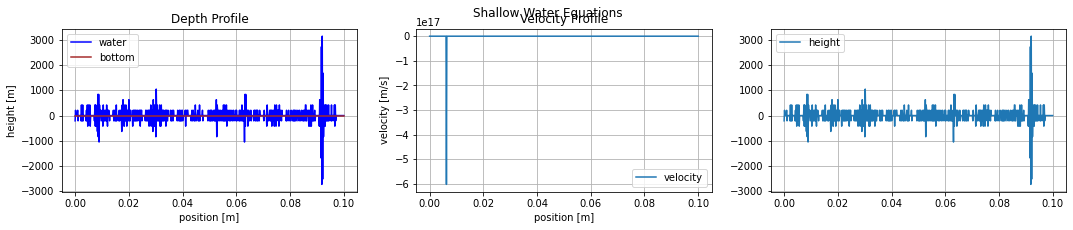

In [51]:
fig, axs = matplotlib.pyplot.subplots(1, 3, figsize=(6 * 3, 4))


def update(frame):
    fig.suptitle(f"Shallow Water Equations")
    for ax in axs:
        ax.cla()
    for ax in axs:
        ax.grid()
    axs[0].set(
        xlabel="position [m]",
        ylabel="height [m]",
        title=f"Depth Profile",
    )
    axs[1].set(
        xlabel="position [m]",
        ylabel="velocity [m/s]",
        title=f"Velocity Profile",
    )

    grid = frame.pop("grid")
    for key, value in frame.items():
        if key == "water":
            axs[0].plot(grid, value, color="blue", label=key)
        elif key == "bottom":
            axs[0].plot(grid, value, color="brown", label=key)
        elif key == "velocity":
            axs[1].plot(grid, value, label=key)
        else:
            axs[2].plot(grid, value, label=key)
    axs[0].legend()
    axs[1].legend()
    axs[2].legend()
    # fig.tight_layout()


animation = matplotlib.animation.FuncAnimation(
    fig, update, frames=frames, interval=100, blit=False, repeat=False
)

IPython.display.HTML(animation.to_jshtml())